In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import cv2
import random

# Loading the model that already fitted and data (images) to predict

In [2]:
model = tf.keras.models.load_model('my_model_cards.h5py')

In [3]:
CATEGORIES = ['ace of clubs', 'ace of diamonds', 'ace of hearts',
       'ace of spades', 'eight of clubs', 'eight of diamonds',
       'eight of hearts', 'eight of spades', 'five of clubs',
       'five of diamonds', 'five of hearts', 'five of spades',
       'four of clubs', 'four of diamonds', 'four of hearts',
       'four of spades', 'jack of clubs', 'jack of diamonds',
       'jack of hearts', 'jack of spades', 'joker', 'king of clubs',
       'king of diamonds', 'king of hearts', 'king of spades',
       'nine of clubs', 'nine of diamonds', 'nine of hearts',
       'nine of spades', 'queen of clubs', 'queen of diamonds',
       'queen of hearts', 'queen of spades', 'seven of clubs',
       'seven of diamonds', 'seven of hearts', 'seven of spades',
       'six of clubs', 'six of diamonds', 'six of hearts',
       'six of spades', 'ten of clubs', 'ten of diamonds',
       'ten of hearts', 'ten of spades', 'three of clubs',
       'three of diamonds', 'three of hearts', 'three of spades',
       'two of clubs', 'two of diamonds', 'two of hearts',
       'two of spades']
def create_data(data, DATADIR, IMG_SIZE = 128):
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)  # create path
        if not os.path.exists(path):
            print(f"Category {category} not found, skipping.")
            continue
        class_num = CATEGORIES.index(category)  # get the classification 

        for img in os.listdir(path):  # iterate over each image
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)  # convert to array
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))  # resize to normalize data size
                data.append([new_array, class_num])  # add this to our training_data
            except OSError as e:
                print("OSError - Bad img most likely", e, os.path.join(path, img))
            except Exception as e:
                print("General exception", e, os.path.join(path, img))


In [5]:
test = []
create_data(test,r"C:\Users\vital\Desktop\tb_chest_radiogramms\Cards\prediction_test")

Category five of clubs not found, skipping.
Category five of diamonds not found, skipping.
Category five of hearts not found, skipping.
Category five of spades not found, skipping.
Category four of clubs not found, skipping.
Category four of diamonds not found, skipping.
Category four of hearts not found, skipping.
Category four of spades not found, skipping.
Category jack of clubs not found, skipping.
Category jack of diamonds not found, skipping.
Category nine of clubs not found, skipping.
Category nine of diamonds not found, skipping.
Category nine of hearts not found, skipping.
Category nine of spades not found, skipping.
Category queen of clubs not found, skipping.
Category queen of diamonds not found, skipping.
Category queen of hearts not found, skipping.
Category queen of spades not found, skipping.
Category seven of clubs not found, skipping.
Category seven of diamonds not found, skipping.
Category seven of hearts not found, skipping.
Category seven of spades not found, skippi

# Bringing the images into the shape that model accepts as input

In [4]:
def scale(image):
    # we make sure the value is a float
    image = tf.cast(image, tf.float32)
    # since the possible values for the inputs are 0 to 255 (256 different shades of grey)
    # if we divide each element by 255, we would get the desired result -> all elements will be between 0 and 1
    image /= 255.

    return image
#spliting scaled images into the input and label
def split(X,y,data):
    for features,label in data:
        X.append(features)
        y.append(label)
    return data

In [7]:
random.shuffle(test)
X = []
y = []
split(X,y,test)
X = [scale(x) for x in X]

In [8]:
X = np.array(X)
y = np.array(y)

**using model to classify images**

In [9]:
y_pred = model.predict(X)

41/41 [==============================] - 4s 86ms/step


# Result display

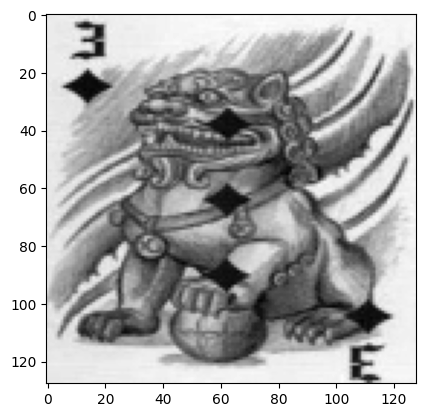

Real result:three of diamonds
three of diamonds


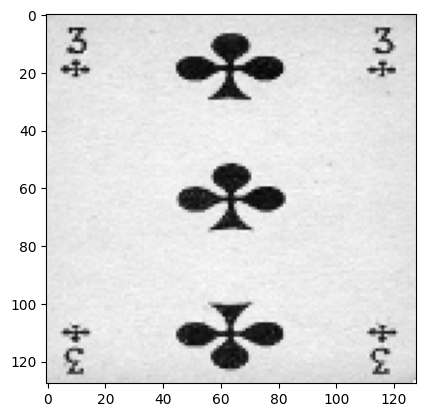

Real result:three of clubs
three of clubs


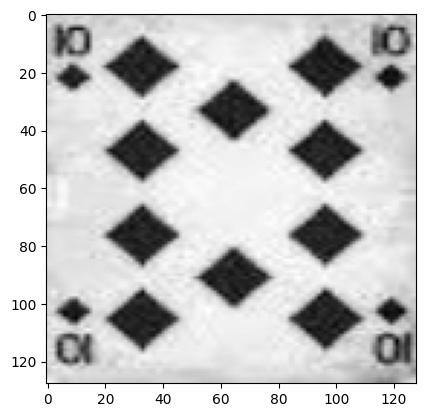

Real result:ten of diamonds
ten of diamonds


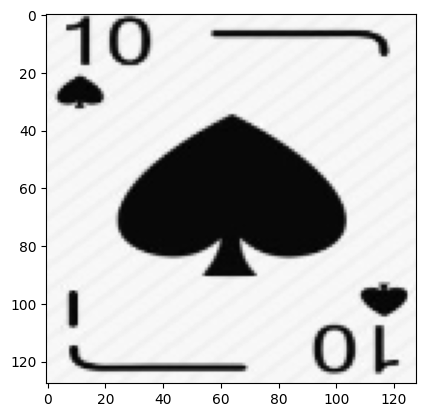

Real result:ten of spades
ten of spades


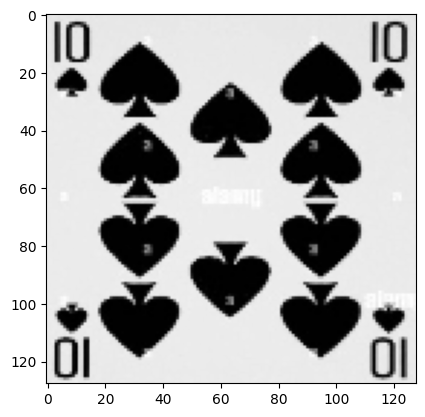

Real result:ten of spades
ten of spades


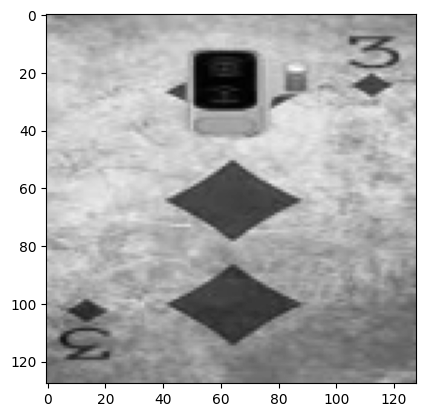

Real result:three of diamonds
three of diamonds


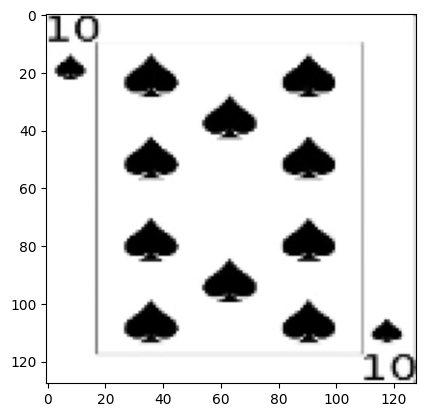

Real result:ten of spades
ten of spades


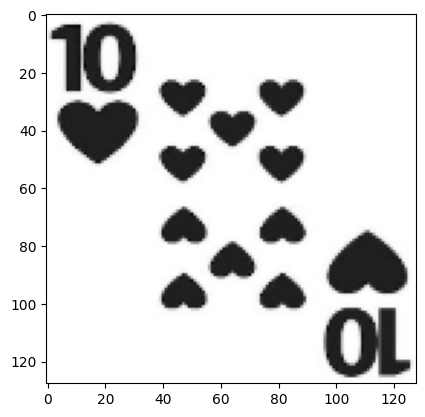

Real result:ten of hearts
ten of hearts


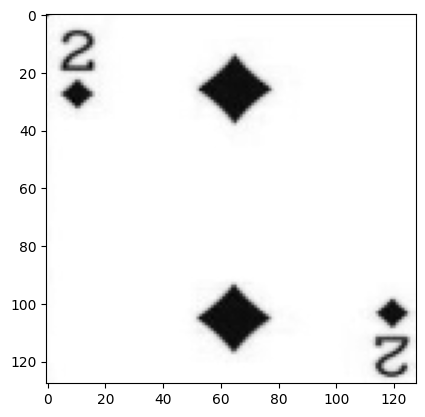

Real result:two of diamonds
two of diamonds


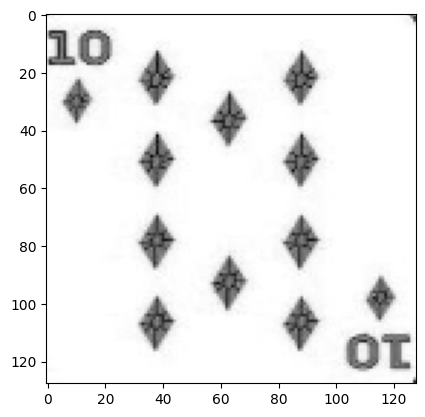

Real result:ten of diamonds
ten of diamonds


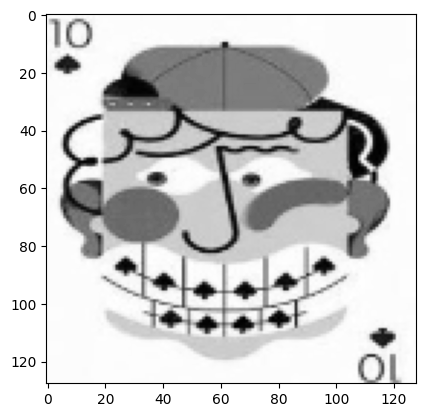

Real result:ten of spades
ten of spades


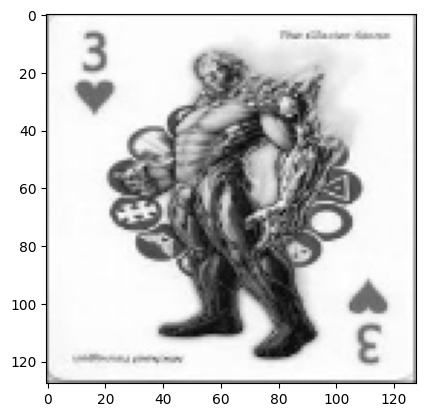

Real result:three of hearts
three of hearts


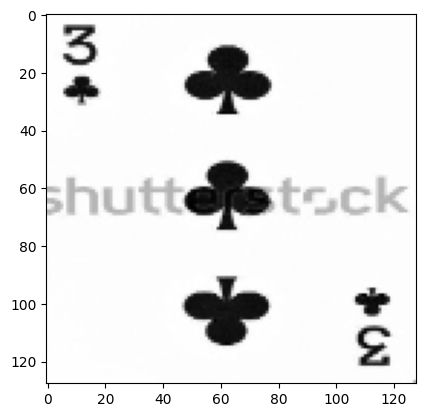

Real result:three of clubs
three of clubs


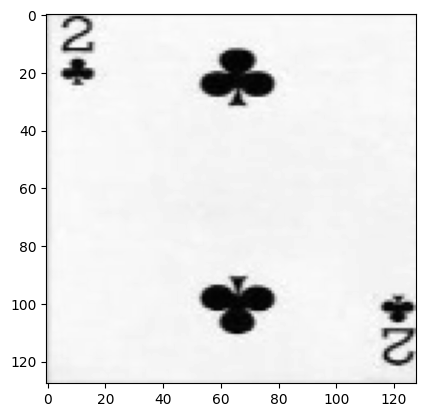

Real result:two of clubs
two of clubs


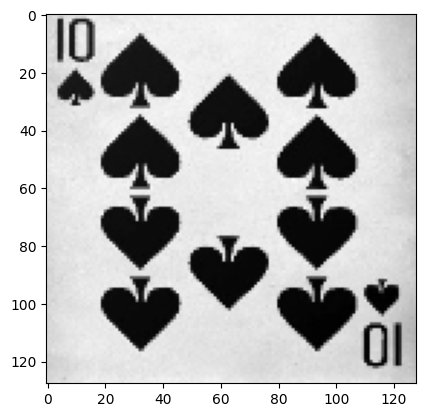

Real result:ten of spades
ten of spades


In [11]:
for i in range(15):
    plt.imshow(X[i], cmap='gray')
    plt.show()
    print(f"Real result:{CATEGORIES[y[i]]}")
    print(CATEGORIES[np.argmax(y_pred[i])])